In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
prior = pd.read_csv("D:\wow\python study\wd_python\培训\笔记\ml\python_ml\data\instacart/order_products__prior.csv")

In [3]:
#产品id和产品名称的对应
products = pd.read_csv("D:\wow\python study\wd_python\培训\笔记\ml\python_ml\data\instacart/products.csv")

In [4]:
#订单id和用户id的对应
orders = pd.read_csv("D:\wow\python study\wd_python\培训\笔记\ml\python_ml\data\instacart/orders.csv")

In [5]:
#超市的过道，过道放的产品的品类
aisles = pd.read_csv("D:\wow\python study\wd_python\培训\笔记\ml\python_ml\data\instacart/aisles.csv")

In [6]:
# 合并四张表到一张表  （用户-物品类别）
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [7]:
# 交叉表（特殊的分组工具）
cross = pd.crosstab(mt['user_id'], mt['aisle'])

In [8]:
pca = PCA(n_components=0.9)

PCA(n_components=0.9)

In [11]:
cross.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [10]:
data = pca.fit_transform(cross)

data.shape

(206209, 27)

In [12]:
x = data[:500]
x.shape

(500, 27)

In [13]:
km = KMeans(n_clusters=4)
km.fit(x)
predict = km.predict(x)

In [14]:
plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

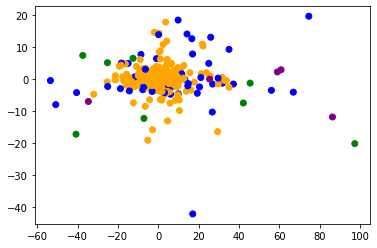

In [15]:
# 建立四个颜色的列表
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict]
plt.scatter(x[:, 2], x[:, 20], color=colr)

In [17]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

0.6091068899459945